In [23]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [24]:
# Load Data Into the Data Frame
df = pd.read_csv('data.csv')


In [25]:
# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [26]:
# One-Hot Encoding for Categorical Variables
categorical_columns = ['Cut', 'Color', 'Clarity', 'GemstoneName']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # drop_first=True to avoid multicollinearity


In [27]:
# Data Splitting
features = ["year", "month", "day"] + [col for col in df.columns if col.startswith('Cut_') or col.startswith('Color_') or col.startswith('Clarity_') or col.startswith('GemstoneName_')]
target = "Price"

In [28]:
X = df[features]
y = df[target]

In [29]:
print(df.head())


        Date  Weight  Price  year  month  day  Cut_Heart  Cut_Oval  Cut_Peer  \
0 2021-01-15    1.36   9000  2021      1   15          0         1         0   
1 2021-01-15    0.75  18000  2021      1   15          0         1         0   
2 2021-01-17    1.36   9000  2021      1   17          0         1         0   
3 2021-01-28    0.75  18000  2021      1   28          0         1         0   
4 2021-02-12    0.73  20000  2021      2   12          0         0         0   

   Color_Brown  ...  Color_Red  Color_White  Color_Yellow  \
0            1  ...          0            0             0   
1            0  ...          0            0             1   
2            1  ...          0            0             0   
3            0  ...          0            0             1   
4            0  ...          0            0             0   

   Clarity_Transparent  GemstoneName_Cat's Eye  GemstoneName_Ruby  \
0                    1                       0                  0   
1             

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Model Training
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10, min_samples_split=2, max_features=20)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features=20, n_estimators=500,
                      random_state=42)

In [74]:
# Making predictions
rf_preds = rf_reg.predict(X_test)

# Evaluating the model
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest R^2: {rf_r2}")

rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest MAE: {rf_mae}")

Random Forest R^2: 0.7115658718334656
Random Forest RMSE: 39177.24248697366
Random Forest MAE: 23698.393238380242


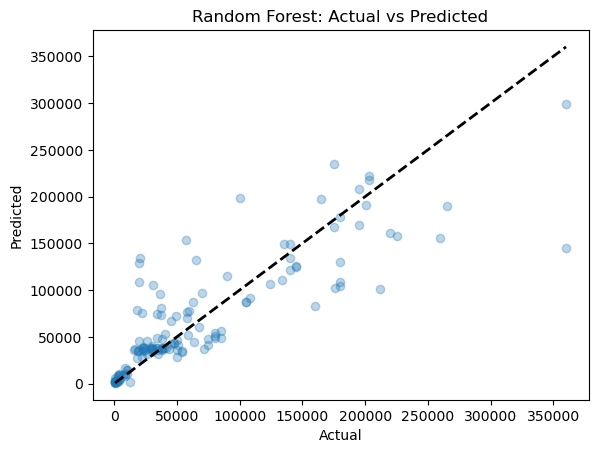

In [75]:
# Comparison of Actual Values and Predicted Values
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()